<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Platypus library - capabilities exploration

**Reference [1]:** https://github.com/Project-Platypus/Platypus<br>
**Reference [2]:** https://platypus.readthedocs.io/en/latest/getting-started.html<br>

<br></font>
</div>

# Import modules

In [ ]:
from platypus import NSGAII, Problem, Real
from platypus import NSGAII, NSGAIII, DTLZ2
import matplotlib.pyplot as plt
from platypus.operators import PCX
from matplotlib import rcParams
from platypus import Problem, Permutation, nondominated
from platypus import NSGAII, NSGAIII, DTLZ2, Hypervolume, experiment, calculate, display
rcParams['figure.figsize'] = 14, 8
rcParams['font.size'] = 20

# Getting rid of the warning messages
import warnings
warnings.filterwarnings("ignore")

# Test functions for mulit-objectives problems

<div class="alert alert-block alert-info">
<font color=black><br>

- A list of challenging test function can be found here: https://en.wikipedia.org/wiki/Test_functions_for_optimization
        
<br></font>
</div>

# Example No. 1 - bounded + unconstrained + bi-objective

<div class="alert alert-block alert-info">
<font color=black><br>

- **Bounded**      = means the x variable can take only certain values
- **Uncostrained** = means there is no constraint beig enforced on the 2 objective functions
- **Bi-objective** = means there are 2 objective to minimise, maximise or a mix of these two

<br></font>
</div>

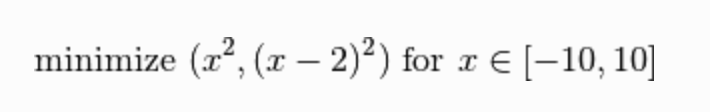

In [ ]:
# Create test function
def schaffer(x):
        return [x[0]**2, (x[0]-2)**2]

# instantiate the optimization algorithm    

# 1 is the number of decision variables, 2 is the number of objectives
problem = Problem(1, 2)

# The notation problem.types[:] is a shorthand way to assign all decision variables to the same type. 
problem.types[:] = Real(-10, 10)
problem.function = schaffer

# optimize the problem using 10,000 function evaluations
algorithm = NSGAII(problem)
algorithm.run(10000)

# display the results
for solution in algorithm.result:
    print(solution.objectives)

In [ ]:
# showing in a slightly better way
print(" Obj1\t Obj2")

for solution in algorithm.result[:5]:
    print("%0.6f\t%0.6f" % tuple(solution.objectives))

In [ ]:
plt.scatter([s.objectives[0] for s in algorithm.result],
            [s.objectives[1] for s in algorithm.result])
#plt.xlim([0, 1.1])
#plt.ylim([0, 1.1])
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.show()

In [ ]:
# An equivalent but more reusable way to define this problem is extending the Problem class.

In [ ]:
class Schaffer(Problem):

    def __init__(self):
        super(Schaffer, self).__init__(1, 2)
        self.types[:] = Real(-10, 10)
    
    def evaluate(self, solution):
        x = solution.variables[:]
        solution.objectives[:] = [x[0]**2, (x[0]-2)**2]

algorithm = NSGAII(Schaffer())
algorithm.run(10000)

# Example No. 2 - using problem from library

<div class="alert alert-block alert-info">
<font color=black><br>

- Note that we did not need to specify many settings when constructing NSGA-II. 
- For any options NOT specified by the user, Platypus supplies the appropriate settings using best practices. 
- In this example, Platypus inspected the problem definition to determine that the DTLZ2 problem consists 
of real-valued decision variables and selected the Simulated Binary Crossover (SBX) and Polynomial Mutation 
(PM) operators. 
- One can easily switch to using different operators, such as Parent-Centric Crossover (PCX):

<br></font>
</div>

In [ ]:
# define the problem definition
problem = DTLZ2()

# instantiate the optimization algorithm
algorithm = NSGAII(problem)

# optimize the problem using 10,000 function evaluations
algorithm.run(10000)

# display the results
for solution in algorithm.result:
    print(solution.objectives)

In [ ]:
plt.scatter([s.objectives[0] for s in algorithm.result],
            [s.objectives[1] for s in algorithm.result])
#plt.xlim([0, 1.1])
#plt.ylim([0, 1.1])
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.show()

# Example No. 3 - changing attributes

<div class="alert alert-block alert-info">
<font color=black><br>

- Changing some attributes from the problem above

<br></font>
</div>

In [ ]:
problem = DTLZ2()

algorithm = NSGAII(problem, variator = PCX())
algorithm.run(10000)

In [ ]:
plt.scatter([s.objectives[0] for s in algorithm.result],
            [s.objectives[1] for s in algorithm.result])
#plt.xlim([0, 1.1])
#plt.ylim([0, 1.1])
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.show()

# Example #4 - bounded + constrained + bi-objective

<div class="alert alert-block alert-info">
<font color=black><br>

- Belegundu problem
- Examples of other constraints types are: ">=0", "==0", or "!=5".
- The final population could contain infeasible and dominated solutions if the number of function evaluations
was **insufficient** (e.g. algorithm.Run(100)). 
- In this case we would need to filter out the **infeasible solutions**.
    
<br></font>
</div>

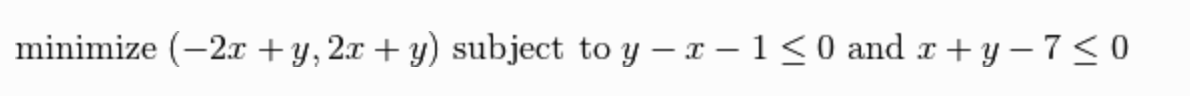

In [ ]:
def belegundu(vars):
    x = vars[0]
    y = vars[1]
    return [-2*x + y, 2*x + y], [-x + y - 1, x + y - 7]

# (2, 2, 2) means that have we have 2 decision variables, 2 objectives, and 2 constraints, respectively.
problem = Problem(2, 2, 2)

# type and DVs bounds! also called feasability criteria
problem.types[:] = [Real(0, 5), Real(0, 3)]

# The constraint feasibility criteria is specified as the string 
# "<=0", meaning a solution is feasible if the constraint values are less than or equal to zero.
problem.constraints[:] = "<=0"
problem.function = belegundu

algorithm = NSGAII(problem)
algorithm.run(10000)

In [ ]:
feasible_solutions = [s for s in algorithm.result if s.feasible]
infeasible_solutions = [s for s in algorithm.result if not s.feasible]

In [ ]:
nondominated_solutions = nondominated(algorithm.result)

In [ ]:
plt.scatter([s.objectives[0] for s in algorithm.result],
            [s.objectives[1] for s in algorithm.result])

plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.show()

<div class="alert alert-block alert-info">
<font color=black><br>

- Alternatively, we can develop a reusable class for this problem by extending the Problem class. 
- Like before,  we move the type and constraint declarations to the __init__ method and assign the solution’s constraints attribute 
in the evaluate method.

<br></font>
</div>

In [ ]:
class Belegundu(Problem):

    def __init__(self):
        super(Belegundu, self).__init__(2, 2, 2)
        self.types[:] = [Real(0, 5), Real(0, 3)]
        self.constraints[:] = "<=0"
    
    def evaluate(self, solution):
        x = solution.variables[0]
        y = solution.variables[1]
        solution.objectives[:] = [-2*x + y, 2*x + y]
        solution.constraints[:] = [-x + y - 1, x + y - 7]
        
algorithm = NSGAII(Belegundu())
algorithm.run(10000)

<div class="alert alert-block alert-info">
<font color=black><br>

- In these examples, we have assumed that the objectives are being minimized. Platypus is flexible and allows the
optimization direction to be changed per objective by setting the directions attribute. 
- For example: **problem.directions[:] = Problem.MAXIMIZE**

<br></font>
</div>

# Example #5

<div class="alert alert-block alert-info">
<font color=black><br>

- https://github.com/Project-Platypus/Platypus/blob/master/example.py

<br></font>
</div>

In [ ]:
# define the problem definition
problem = DTLZ2(3)

# instantiate the optimization algorithm
algorithm = NSGAIII(problem, divisions_outer=12)

# optimize the problem using 10,000 function evaluations
algorithm.run(10000)

# plot the results using matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([s.objectives[0] for s in algorithm.result],
           [s.objectives[1] for s in algorithm.result],
           [s.objectives[2] for s in algorithm.result])
plt.show()

# Example #6 -  comparing different algorithms

<div class="alert alert-block alert-info">
<font color=black><br>

- https://github.com/Project-Platypus/Platypus/blob/master/examples/comparison.py
- NSGA-III requires an additional argument called divisions_outer, which controls the number and spacing 
of reference points. 
- A larger value will produce more Pareto optimal points. For 3-objective problems, 
12 divisions works well.

<br></font>
</div>

In [ ]:
from platypus import *
problem = DTLZ2(3)        
algorithms = [NSGAII,
              (NSGAIII, {"divisions_outer":12}),
              (CMAES, {"epsilons":[0.05]}),
              GDE3,
              IBEA,
              (MOEAD, {"weight_generator":normal_boundary_weights, "divisions_outer":12}),
              (OMOPSO, {"epsilons":[0.05]}),
              SMPSO,
              SPEA2,
              (EpsMOEA, {"epsilons":[0.05]})]

# run the experiment using Python 3's concurrent futures for parallel evaluation
with ProcessPoolEvaluator() as evaluator:
    results = experiment(algorithms, problem, seeds=1, nfe=10000, evaluator=evaluator)

# display the results
fig = plt.figure()

for i, algorithm in enumerate(six.iterkeys(results)):
    result = results[algorithm]["DTLZ2"][0]

    ax = fig.add_subplot(2, 5, i+1, projection='3d')
    ax.scatter([s.objectives[0] for s in result],
               [s.objectives[1] for s in result],
               [s.objectives[2] for s in result])
    ax.set_title(algorithm)
    ax.set_xlim([0, 1.1])
    ax.set_ylim([0, 1.1])
    ax.set_zlim([0, 1.1])
    ax.view_init(elev=30.0, azim=15.0)
    ax.locator_params(nbins=4)

plt.show()

<div class="alert alert-block alert-info">
<font color=black><br>

- THE ONES ABOVE ARE ALL PARETO FRONT!
- As demonstrated, we can quickly solve multiobjective optimization problems and display results. Platypus is great 
for education or learning about multiobjective optimization. If considering Platypus for real applications, please 
note that its performance is slow.
- For applications demanding high performance, check out http://moeaframework.org/. 
- The MOEA Framework provides a similar architecture to Platypus, but achieves 10-100x better performance.

<br></font>
</div>

# Calculate the quality of the results - hypervolume

<div class="alert alert-block alert-info">
<font color=black><br>

- Once this data is collected, we can then use statistical tests to determine if there is any statistical 
difference between the results. 
- In this case, we may want to use the Mann-Whitney U test from scipy.stats.mannwhitneyu.

<br></font>
</div>

In [ ]:
algorithms = [NSGAII, (NSGAIII, {"divisions_outer":12})]
problems = [DTLZ2(3)]

# run the experiment
results = experiment(algorithms, problems, nfe=10000, seeds=10)

# calculate the hypervolume indicator
hyp = Hypervolume(minimum=[0, 0, 0], maximum=[1, 1, 1])
hyp_result = calculate(results, hyp)
display(hyp_result, ndigits=3)

# Calculaty the quality of the results - hypevolume in parallel

In [ ]:
"""
https://github.com/Project-Platypus/Platypus/blob/master/examples/experimenter_parallel.py
"""

In [ ]:
algorithms = [NSGAII, (NSGAIII, {"divisions_outer":12})]
problems = [DTLZ2(3)]

with ProcessPoolEvaluator(8) as evaluator:
    results = experiment(algorithms, problems, nfe=10000, evaluator=evaluator)

    hyp = Hypervolume(minimum=[0, 0, 0], maximum=[1, 1, 1])
    hyp_result = calculate(results, hyp, evaluator=evaluator)
    display(hyp_result, ndigits=3)

# Indicator

In [ ]:
"""

"""

In [ ]:
import random
from platypus import (NSGAII, DTLZ2, Solution, EpsilonBoxArchive, GenerationalDistance, InvertedGenerationalDistance,
                      Hypervolume, EpsilonIndicator, Spacing)

# create the problem
problem = DTLZ2(3)

# solve it using NSGA-II
algorithm = NSGAII(problem)
algorithm.run(10000)

# generate the reference set for 3D DTLZ2
reference_set = EpsilonBoxArchive([0.02, 0.02, 0.02])

for _ in range(1000):
    solution = Solution(problem)
    solution.variables = [random.uniform(0,1) if i < problem.nobjs-1 else 0.5 for i in range(problem.nvars)]
    solution.evaluate()
    reference_set.add(solution)

# compute the indicators
gd = GenerationalDistance(reference_set)
print("Generational Distance:", gd.calculate(algorithm.result))

igd = InvertedGenerationalDistance(reference_set)
print("Inverted Generational Distance:", igd.calculate(algorithm.result))

hyp = Hypervolume(reference_set)
print("Hypervolume:", hyp.calculate(algorithm.result))

ei = EpsilonIndicator(reference_set)
print("Epsilon Indicator:", ei.calculate(algorithm.result))

sp = Spacing()
print("Spacing:", sp.calculate(algorithm.result))

In [ ]:
# plot the result versus the reference set
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter([s.objectives[0] for s in reference_set],
           [s.objectives[1] for s in reference_set],
           [s.objectives[2] for s in reference_set],
           c="red",
           edgecolors="none",
           label="Reference Set")

#ax.scatter([s.objectives[0] for s in algorithm.result],
#           [s.objectives[1] for s in algorithm.result],
#           [s.objectives[2] for s in algorithm.result],
#           c="blue",
#           edgecolors="none",
#           label = "NSGA-II Result")

ax.set_title("Reference Set")
ax.set_xlim([0, 1.1])
ax.set_ylim([0, 1.1])
ax.set_zlim([0, 1.1])
ax.set_xlabel("$f_1(x)$")
ax.set_ylabel("$f_2(x)$")
ax.set_zlabel("$f_3(x)$")
#ax.view_init(elev=30.0, azim=15.0)
#ax.locator_params(nbins=4)
ax.legend()
plt.show()

# Knapsack problem

In [ ]:
from platypus import GeneticAlgorithm, Problem, Constraint, Binary, nondominated, unique

# This simple example has an optimal value of 15 when picking items 1 and 4.
items = 7
capacity = 9
weights = [2, 3, 6, 7, 5, 9, 4]
profits = [6, 5, 8, 9, 6, 7, 3]
    
def knapsack(x):
    selection = x[0]
    total_weight = sum([weights[i] if selection[i] else 0 for i in range(items)])
    total_profit = sum([profits[i] if selection[i] else 0 for i in range(items)])
    
    return total_profit, total_weight

problem = Problem(1, 1, 1)
problem.types[0] = Binary(items)
problem.directions[0] = Problem.MAXIMIZE
problem.constraints[0] = Constraint("<=", capacity)
problem.function = knapsack

algorithm = GeneticAlgorithm(problem)
algorithm.run(10000)

for solution in unique(nondominated(algorithm.result)):
    print(solution.variables, solution.objectives)

# Simple indicators

In [ ]:
import math
import numpy
from platypus import *

# Define the problem definition.
problem = DTLZ2()

# Instantiate the optimization algorithm.
algorithm = NSGAII(problem)

# Optimize the problem using 10,000 function evaluations.
algorithm.run(10000)

# Create the reference set.  For 2-objective DTLZ2, the reference set
# solutions must satisfy the equation x^2 + y^2 = 1.
ref_set = []

for x in numpy.arange(0.0, 1.0, 0.01):
    solution = Solution(problem)
    solution.objectives[:] = [x, math.sqrt(1.0 - x**2)]
    ref_set.append(solution)

# Calculate the performance metrics.
hyp = Hypervolume(reference_set = ref_set)
print("Hypervolume:", hyp.calculate(algorithm.result))

gd = GenerationalDistance(reference_set = ref_set)
print("GD:", gd.calculate(algorithm.result))

igd = InvertedGenerationalDistance(reference_set = ref_set)
print("IGD:", igd.calculate(algorithm.result))

aei = EpsilonIndicator(reference_set = ref_set)
print("Eps-Indicator:", aei.calculate(algorithm.result))

spacing = Spacing()
print("Spacing:", spacing.calculate(algorithm.result))

In [ ]:
plt.scatter([s.objectives[0] for s in algorithm.result],
            [s.objectives[1] for s in algorithm.result])
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.show()

# Simple MPI - cluster

In [ ]:
"""
This is the bash script we use to submit the job to the cluster

#PBS -N simple_mpi
#PBS -l nodes=1:ppn=16
#PBS -l walltime=1:00:00
#PBS -j oe
#PBS -o simple_mpi.out

cd $PBS_O_WORKDIR

module load python-2.7.5
mpirun python simple_mpi.py
"""

In [ ]:
"""
this file must be saved under this file name: simple_mpi.py and then you use the bash script above for submission
"""

from platypus import NSGAII, DTLZ2, PoolEvaluator
from platypus.mpipool import MPIPool
import sys
import logging

logging.basicConfig(level=logging.INFO)

# simulate an computationally expensive problem
class DTLZ2_Slow(DTLZ2):
    
    def evaluate(self, solution):
        sum(range(1000000))
        super(DTLZ2_Slow, self).evaluate(solution)

if __name__ == "__main__":
    # define the problem definition
    problem = DTLZ2_Slow()
    pool = MPIPool()

    # only run the algorithm on the master process
    if not pool.is_master():
        pool.wait()
        sys.exit(0)

    # instantiate the optimization algorithm to run in parallel
    with PoolEvaluator(pool) as evaluator:
        algorithm = NSGAII(problem, evaluator=evaluator)
        algorithm.run(10000)
    
    # display the results
    for solution in algorithm.result:
        print(solution.objectives)

    pool.close()

# Simple parallel - you local PC - multi-threading

In [ ]:
from platypus import NSGAII, DTLZ2, ProcessPoolEvaluator

# simulate an computationally expensive problem
class DTLZ2_Slow(DTLZ2):
    
    def evaluate(self, solution):
        sum(range(1000000))
        super(DTLZ2_Slow, self).evaluate(solution)

if __name__ == "__main__":
    # define the problem definition
    problem = DTLZ2_Slow()

    # instantiate the optimization algorithm to run in parallel
    with ProcessPoolEvaluator(4) as evaluator:
        algorithm = NSGAII(problem, evaluator=evaluator)
        algorithm.run(10000)

    # display the results
    for solution in algorithm.result:
    print(solution.objectives)